<a href="https://colab.research.google.com/github/julianovale/DATA_DataSciencePython/blob/main/Aula15_DataSciencePython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importando algumas das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importando a base de dados (trabalhada anteriormente nas aulas 8, 9 e 10)
url = 'https://raw.githubusercontent.com/julianovale/DATA_DataSciencePython/main/data/dados_editados.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Faixa etaria
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Adulto
1,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Adulto
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Adulto
3,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Adulto
4,6,0,3,"Moran, Mr. James",male,29.709916,0,0,330877,8.4583,Q,Adulto


In [3]:
# verificando os nomes das colunas
df.columns.ravel()

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Faixa etaria'],
      dtype=object)

In [4]:
# limpando o DataFrame só para as colunas relevantes
df.drop(columns=['PassengerId','Name','Ticket','Faixa etaria'], inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,38.000000,1,0,71.2833,C
1,1,3,female,26.000000,0,0,7.9250,S
2,1,1,female,35.000000,1,0,53.1000,S
3,0,3,male,35.000000,0,0,8.0500,S
4,0,3,male,29.709916,0,0,8.4583,Q


In [5]:
# fazendo o encoding: transformando features categóricas em numéricas, sob a técnica "One-hot-Encoding"
# a) verificando o tipo de cada coluna. As colunas do tipo object serão codificadas para variáveis dummy.
lista = []
for i in df.columns:
  if df[i].dtype == object:
    lista.append(i)

print(lista)

['Sex', 'Embarked']


In [6]:
# b) aplicando o one-hot encoding:
df = pd.get_dummies(df)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,1,38.000000,1,0,71.2833,1,0,1,0,0
1,1,3,26.000000,0,0,7.9250,1,0,0,0,1
2,1,1,35.000000,1,0,53.1000,1,0,0,0,1
3,0,3,35.000000,0,0,8.0500,0,1,0,0,1
4,0,3,29.709916,0,0,8.4583,0,1,0,1,0


In [7]:
# normalizando os dados (transformando para a mesma escala)
# a) importando método do scikitlean:

from sklearn.preprocessing import MinMaxScaler

In [8]:
# b) aplicando normalização:

scaler = MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns=df.columns)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.321438,0.000,0.0,0.015469,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.434531,0.125,0.0,0.103644,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.434531,0.000,0.0,0.015713,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.368056,0.000,0.0,0.016510,0.0,1.0,0.0,1.0,0.0


In [9]:
# dividir qual é o target e o que é feature

target = 'Survived'
features = list(df.columns)
features.remove(target)

print(target)
print(features)

Survived
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


In [12]:
# splitando o conjunto de treinamento e de validação

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(df[features], df[target], test_size = 0.2, random_state = 42) # random_state é a "seed" do random

print("independente - treinamento")
print(x_train)
print("independente - validação")
print(x_val)
print("resposta - treinamento")
print(y_train)
print("resposta - validação")
print(y_val)

independente - treinamento
     Pclass       Age  SibSp  ...  Embarked_C  Embarked_Q  Embarked_S
707     1.0  0.368056  0.125  ...         1.0         0.0         0.0
239     1.0  0.368056  0.125  ...         0.0         1.0         0.0
381     0.0  0.434531  0.125  ...         0.0         0.0         1.0
791     0.0  0.368056  0.000  ...         1.0         0.0         0.0
682     0.5  0.748681  0.125  ...         0.0         0.0         1.0
..      ...       ...    ...  ...         ...         ...         ...
106     1.0  0.472229  0.000  ...         0.0         0.0         1.0
270     0.5  0.509927  0.000  ...         0.0         0.0         1.0
860     1.0  0.368056  1.000  ...         0.0         0.0         1.0
435     0.5  0.296306  0.250  ...         0.0         0.0         1.0
102     1.0  0.459663  0.250  ...         0.0         0.0         1.0

[710 rows x 10 columns]
independente - validação
     Pclass       Age  SibSp  ...  Embarked_C  Embarked_Q  Embarked_S
280     1.0  

In [13]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 1) # definindo o "k" (número de vizinhos mais próximos)

clf.fit(x_train, y_train) # ajustando o modelo (treinamento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [14]:
# realizando uma predição

y_pred = clf.predict(x_val)

In [16]:
y_pred

array([0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1.])

In [15]:
# verificando a acurácia:

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_val, y_pred)
print("Acurácia = ", acc)

Acurácia =  0.7808988764044944


In [17]:
# verificando com quantos vizinhos, entre 1 e 10, retorna a melhor acurácia (melhor ajuste)
# otimização hiperparâmetro

n_vizinhos = np.arange(1, 11)

resultados = []

for k in n_vizinhos:
  clf = KNeighborsClassifier(n_neighbors = k)
  clf.fit(x_train, y_train);
  y_pred = clf.predict(x_val)
  acc = accuracy_score(y_val, y_pred)
  resultados.append(acc)

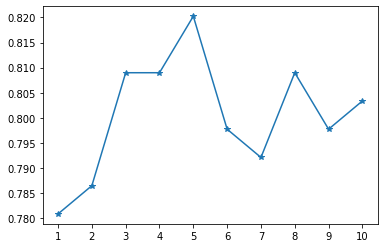

In [23]:
plt.plot(n_vizinhos, resultados, '-*')
plt.xticks(n_vizinhos); # força a marcação de todos os valores de x no eixo

In [ ]:
# o melhor k ficou em 5.